# Exportando a MobileNetV2 pre treinada com a image net para cosntruir adaptação da rede e usar como descritor

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import os
import glob

#1. Carregando modelo pré-treinado MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,  # Removendo camadas que fazem a classificação
    weights='imagenet'
)
base_model.trainable = False  # Não permite treinamento, matem os pesos (Não sei como usar os pesos faria sentido)

# Adiciona uma camada para transformar em vetor descritor
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),  # Aplica GlobalAveragePooling2D na ultima camada, para converter a saída 3D em um vetor
])

#2 . Pré-processamento da imagem (dando resize para o tamanho certo e normalziando os pixels)
def preprocess_frame(frame):
    frame = cv2.resize(frame, (224, 224))
    frame = tf.keras.applications.mobilenet_v2.preprocess_input(frame)
    return frame

#3. Função para extrair descritor de um frame
def get_frame_descriptor(image_path):
    image = cv2.imread(image_path)
    frame = preprocess_frame(image)
    frame = np.expand_dims(frame, axis=0)  # Adiciona batch dimension pq precisa pra rodar aparentemente
    descriptor = model.predict(frame)
    return descriptor.flatten()



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Salvamento dos descritores de cada frame organizado em pastas de cada video = sinal = classe. São 3 blocos de codigo pois  cada um salva emuma pasta para um interprete.

In [ ]:
base_path = '/content/drive/MyDrive/Base1A'
DATA_PATH = '/content/drive/MyDrive/npy_output1'  # Salva no drive


# Loop de salvamento das imagens no drive

for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    if os.path.isdir(folder_path):
        output_folder = os.path.join(DATA_PATH, folder_name+"")
        os.makedirs(output_folder, exist_ok=True)

        image_paths = glob.glob(os.path.join(folder_path, '*.png'))

        for img_path in image_paths:
                descriptor = get_frame_descriptor(img_path)
                print("Descritor (shape):", descriptor.shape)

                filename = os.path.basename(img_path)
                filename_npy = os.path.splitext(filename)[0] + '.npy'

                np.save(os.path.join(output_folder, filename_npy), descriptor)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


KeyboardInterrupt: 

In [17]:

# VERSÃO DO LOOP DA PRIMEIRA PASTA PARTINDO DA CLASSE PIPOCA PORQUE DEU ERRO AAAAAAAAAAA
base_path = '/content/drive/MyDrive/Base1A'
DATA_PATH = '/content/drive/MyDrive/npy_output1'

start_processing = False

for folder_name in sorted(os.listdir(base_path)):
    if folder_name == 'PIPOCA':
        start_processing = True

    if not start_processing:
        continue

    folder_path = os.path.join(base_path, folder_name)

    if os.path.isdir(folder_path):
        output_folder = os.path.join(DATA_PATH, folder_name)
        os.makedirs(output_folder, exist_ok=True)

        image_paths = glob.glob(os.path.join(folder_path, '*.png'))

        for img_path in image_paths:
            descriptor = get_frame_descriptor(img_path)
            print("Descritor (shape):", descriptor.shape)

            filename = os.path.basename(img_path)
            filename_npy = os.path.splitext(filename)[0] + '.npy'

            np.save(os.path.join(output_folder, filename_npy), descriptor)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
Descritor (shape): (1280,)


KeyboardInterrupt: 

In [ ]:
base_path = '/content/drive/MyDrive/Base2A'
DATA_PATH = '/content/drive/MyDrive/npy_output2'


for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    if os.path.isdir(folder_path):
        output_folder = os.path.join(DATA_PATH, folder_name+"")
        os.makedirs(output_folder, exist_ok=True)

        image_paths = glob.glob(os.path.join(folder_path, '*.png'))

        for img_path in image_paths:
                descriptor = get_frame_descriptor(img_path)
                print("Descritor (shape):", descriptor.shape)


                filename = os.path.basename(img_path)
                filename_npy = os.path.splitext(filename)[0] + '.npy'

                np.save(os.path.join(output_folder, filename_npy), descriptor)

A saída de streaming foi truncada nas últimas 5000 linhas.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
Descritor (shape): (1280,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
base_path = '/content/drive/MyDrive/BaseA3'
DATA_PATH = '/content/drive/MyDrive/npy_output3'



for folder_name in os.listdir(base_path):
    folder_path = os.path.join(base_path, folder_name)

    if os.path.isdir(folder_path):
        output_folder = os.path.join(DATA_PATH, folder_name+"")
        os.makedirs(output_folder, exist_ok=True)

        image_paths = glob.glob(os.path.join(folder_path, '*.png'))

        for img_path in image_paths:
                descriptor = get_frame_descriptor(img_path)
                print("Descritor (shape):", descriptor.shape)


                filename = os.path.basename(img_path)
                filename_npy = os.path.splitext(filename)[0] + '.npy'

                np.save(os.path.join(output_folder, filename_npy), descriptor)

# Consumindo os varios frames de cada video de cada interprete e transformando em uma matriz representativa de cada video. Organizando X: Matriz de descrição de cada video. y: Classe de cada video.

In [4]:
input_dir = '/content/drive/MyDrive/npy_output'

X = []  # lista com os arrays (n_frames, 1280)
y = []  # lista com os rótulos (tipo 'ABACAXI' sla)

for i in range(1,3):
  for class_name in os.listdir(input_dir+str(i)):
      class_path = os.path.join(input_dir+str(i), class_name)

      if os.path.isdir(class_path):
          frame_files = sorted(os.listdir(class_path))  # garantir ordem dos frames
          frames = []

          for frame_file in frame_files:
              if frame_file.endswith('.npy'):
                  frame_path = os.path.join(class_path, frame_file)
                  descriptor = np.load(frame_path)
                  frames.append(descriptor)

          if frames:
              video_array = np.stack(frames)  # shape: (n_frames, 1280)
              print(i)
              print(class_name)
              class_name  = class_name
              X.append(video_array)
              y.append(class_name)  # usa o nome da pasta como classe

  print(f"Total de amostras: {len(X)}")
  print(f"Shape do primeiro vídeo: {X[0].shape}")
  print(f"Primeira classe: {y[0]}")


A saída de streaming foi truncada nas últimas 5000 linhas.
1
PARALELO
1
PALESTRA
1
PARABENS
1
PAO
1
PALMADA
1
PAGAR
1
OUVIR
1
O_QUE
1
OVELHA
1
OUTRO
1
ORGULHOSO
1
PACIENTE
1
ORIENTAR
1
OSSO
1
PAGAMENTO
1
ORGANIZACAO
1
ORAR
1
OI
1
ONTEM
1
ONDE
1
OLEO
1
ONDULACAO
1
OPINIAO
1
OLHO
1
OPCAO
1
OFICINA
1
OESTE
1
NU_DESPIDO
1
OBSCURO
1
OBESO
1
ODIO
1
OBRIGACAO
1
OBSERVAR
1
OCULOS
1
OCUPADO
1
OBJETIVO
1
OBRIGADO
1
NUVEM_DE_CHUVA
1
NOITE
1
NOME
1
NUMERO
1
NOMEAR
1
NUNCA
1
NUMERO_2
1
NOVO
1
NOVE
1
NORTE
1
NERVOSO
1
NENHUM
1
NARIZ
1
NARIZ_ESCORRENDO
1
NEGLIGENCIAR
1
NECESSARIO
1
NATAL
1
NASCER_DO_SOL
1
NEGATIVO
1
NASCER
1
NEGLIGENTE
1
NATIVO
1
NAO_PODER
1
NAO_E_PROBLEMA_MEU
1
NAO
1
MUSICA
1
MULHER
1
NADA
1
MUSEU
1
MUITO_TEMPO_ATRAS
1
NAMORAR
1
MUNDO
1
NADAR
1
MUITO_RAPIDO
1
MOTOCICLETA
1
MOTIVO
1
MOTIVAR
1
MUITO
1
MOVIMENTO
1
MUDAR
1
MUITOS
1
MOTOR
1
MORRER_FALECER
1
MORDIDA
1
MORAR_JUNTOS
1
MISTURAR
1
MINUTO
1
MOCHILA
1
MONTANHA
1
MOLHADO
1
MILHAO
1
MORANGO
1
MOEDAS
1
MILHO
1
MIL
1
MICROFONE
1
ME

In [6]:
X[0]

array([[0.6634574 , 0.19079278, 0.00219615, ..., 0.        , 1.10872   ,
        0.31301028],
       [0.8684979 , 0.3611436 , 0.        , ..., 0.20642458, 0.39263353,
        0.1736638 ],
       [1.7905402 , 0.4181225 , 0.        , ..., 0.17496377, 0.6884839 ,
        0.15163533],
       [1.3612161 , 0.24141145, 0.        , ..., 0.19149263, 0.62874824,
        0.00582907],
       [0.5200615 , 0.45131493, 0.0030248 , ..., 0.11856461, 1.3204037 ,
        0.7787541 ]], dtype=float32)

# Tratamento dos numeros nas classes, pois esqucemos anteriormente kkkkkk (problema de pastas com nomes iguais no tratamento dos frames)

In [11]:
y_ofc =[]

In [12]:
for i in y:
  y_ofc.append(i.replace("_2",""))

# Calculos das metricas de similaridade (verificar se esta coerente, bom agrupamento das classes), geração do TSNE (para visualizar as classes) e rodar uma regressão logistica (para ver se as descrições estão boas)

## Similaridade Intra/Interclasse

In [18]:
#MUITO PESADO, POIS TEM FOR ANINHADO COMPLEXIDADE de O(N)
from sklearn.metrics.pairwise import cosine_similarity

X_reduced = [np.mean(video, axis=0) for video in X]

intra, inter = [], []

for i in range(len(X_reduced)):
    for j in range(i+1, len(X_reduced)):
        sim = cosine_similarity([X_reduced[i]], [X_reduced[j]])[0][0]
        if y[i] == y[j]:
            intra.append(sim)
        else:
            inter.append(sim)

print(f"Similaridade média intra-classe: {np.mean(intra):.4f}")
print(f"Similaridade média inter-classe: {np.mean(inter):.4f}")

KeyboardInterrupt: 

In [20]:
#Versão com calculo de todas as similaridades de uma vez só com operações de álgebra linear vetorizada. Implementação em C da lib ajuda, pois python é uma carroça
#Usei bastante gpt aqui muito confuso

# 1. Reduzir cada vídeo a um vetor de 1280 (média dos frames)
X_reduced = np.array([np.mean(video, axis=0) for video in X])  # shape (n_videos, 1280)
y_array = np.array(y_ofc)

# 2. Calcular a matriz de similaridade completa (n_videos x n_videos)
similarity_matrix = cosine_similarity(X_reduced)

# 3. Criar uma matriz booleana onde y[i] == y[j] (intra) ou diferente (inter)
same_class = (y_array[:, None] == y_array[None, :])  # shape (n, n)
diff_class = ~same_class

# 4. Pegar só os valores da parte superior da matriz (para evitar duplicados)
triu_indices = np.triu_indices(len(X_reduced), k=1)

# 5. Separar as similaridades intra e inter
intra_sims = similarity_matrix[triu_indices][same_class[triu_indices]]
inter_sims = similarity_matrix[triu_indices][diff_class[triu_indices]]

print(f"Similaridade média intra-classe: {np.mean(intra_sims):.4f}")
print(f"Similaridade média inter-classe: {np.mean(inter_sims):.4f}")


Similaridade média intra-classe: 0.7936
Similaridade média inter-classe: 0.8079


## Visualização com t-SNE

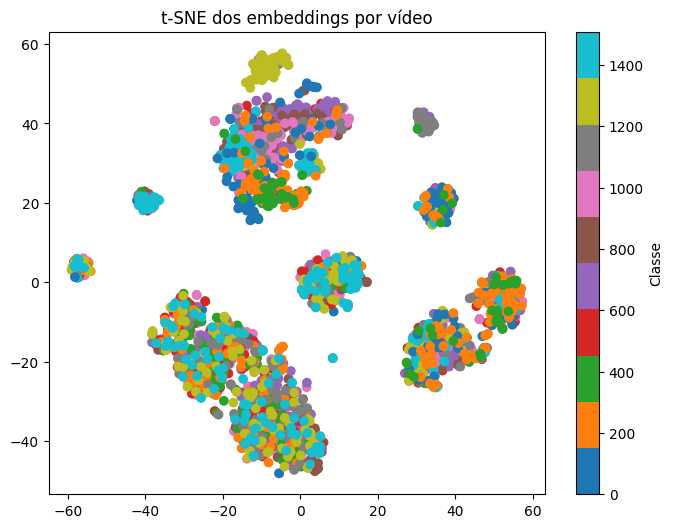

In [22]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_reduced)

le = LabelEncoder()
y_encoded = le.fit_transform(y_ofc)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_encoded, cmap='tab10')
plt.title('t-SNE dos embeddings por vídeo')
plt.colorbar(label='Classe')
plt.show()


In [24]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))

print("📌 Mapeamento de classes:")
for classe, numero in label_mapping.items():
    print(f"{numero} → {classe}")

📌 Mapeamento de classes:
0 → ABACAXI
1 → ABANAR
2 → ABANDONAR
3 → ABELHA
4 → ABENCOAR
5 → ABOBORA
6 → ABORTO
7 → ABRACO
8 → ABRIR_A_JANELA
9 → ABRIR_A_PORTA
10 → ACABAR
11 → ACADEMIA
12 → ACAO
13 → ACEITAR
14 → ACENAR
15 → ACIDENTE
16 → ACIMA
17 → ACOMPANHAR
18 → ACONSELHAR
19 → ACONTECER
20 → ACORDAR
21 → ACRESCENTAR
22 → ACUCAR
23 → ACUCAR_DOCE
24 → ADAPTAR
25 → ADIANTE
26 → ADIAR
27 → ADMITIR
28 → ADQUIRIR
29 → ADULTO
30 → ADVERTIR
31 → AFOGAR
32 → AGARRAR
33 → AGASALHO
34 → AGIR_FAZER
35 → AGITAR
36 → AGORA
37 → AGRADAVEL_LIMPO
38 → AGRESSIVO
39 → AGUA
40 → AGUA_CONGELADA
41 → AINDA
42 → AJOELHAR
43 → AJUDAR
44 → ALARME
45 → ALCE
46 → ALCOOL
47 → ALFINETE
48 → ALGO
49 → ALGUNS
50 → ALIMENTACAO
51 → ALMOCO
52 → ALMOFRFADA
53 → ALTO
54 → ALTURA
55 → ALUNO_DO_SEGUNDO_ANO_DO_ENSINO_MEDIO
56 → AMA
57 → AMANHA
58 → AMARELO
59 → AMARGO
60 → AMBIENTE
61 → AMBOS
62 → AMIGAVEL
63 → AMIGO
64 → ANALISAR
65 → ANDORINHA
66 → ANGUSTIADO
67 → ANIMADO
68 → ANIMAL
69 → ANIMAL_MIMADO
70 → ANIVERSARIO

In [16]:
y_encoded

array([1086, 1085, 1088, ...,  372,  368,  364])

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia no conjunto de teste: {accuracy:.4f}")



Acurácia no conjunto de teste: 0.0039
